## Litteraturbanken Author 
* this [notebook](https://github.com/salgo60/open-data-examples/blob/master/Litteraturbanken%20Author.ipynb)
* [T238932 API Litteraturbanken]([https://phabricator.wikimedia.org/T238932)
  * good documention feels is missing
  * GITHUB 
  * API [Author](https://litteraturbanken.se/api/get_authors)
  * [url_list](https://litteraturbanken.se/api/url_list)
  * [API List all 0-10 include](https://litteraturbanken.se/api/list_all/etext,faksimil,pdf?from=0&to=10&include=authors,forfattare,lbworkid,titlepath,title,librisid,mediatype,main_author.author_id)
    * [List all 0-10](https://litteraturbanken.se/api/list_all/etext,faksimil,pdf?from=0&to=10)
### Issues
#### Filter out authors with no books 
* BergenstråhleJ miss books 
* BjorklundJA miss books

**solution** Filter on field Show

LitteraturbankenTotShow = LitteraturbankenTot[LitteraturbankenTot["show"]==True]  
#### copyright on metadata?
We need CC0 to import data in Wikidata (see [Wikidata:Licensing](https://www.wikidata.org/wiki/Wikidata:Licensing)) e.g. if we should add all books as objecys with no text nut limnks Litteraturbanken then fields like nelow need to be [CC-0](https://creativecommons.org/share-your-work/public-domain/cc0/)  
* Författare
* Verk
* Libris-id 
* förlaga	
* eid	
* Införd	
* Länk i klartext	
* Epub	
* Källa

In [1]:
from datetime import datetime
start_time  = datetime.now()
print("Last run: ", start_time)

Last run:  2020-09-30 07:55:46.378741


In [2]:
import urllib3, json
import pandas as pd 
http = urllib3.PoolManager() 
pd.set_option("display.max.columns", None) 
 
url = "https://litteraturbanken.se/api/get_authors"
r = http.request('GET', url)
data = json.loads(r.data)
df = pd.DataFrame(data["data"])

In [3]:
df.head()

,authorid,authorid_norm,birth,db_checksum,db_timestamp,death,doc_type,full_name,gender,imported,intro,librisid,name_for_index,pictureinfo,searchable,show,surname,updated,wikidata,db_timestamp_updated,dramawebben,popularity,pseudonym,sources,other_name,intro_author,intro_author_norm,picture,bibliography,external_ref,presentation,seemore
0,AarneA,AarneA,"{'date': '1867', 'plain': '1867'}",d4646f71d18e1304e4b16a557dd2f8cf,1600563813743,"{'date': '1925', 'plain': '1925'}",author,Antti Aarne,male,2014-02-11,None,0xbfm5hj2hjvvwn,"Aarne, Antti",None,False,False,Aarne,2019-10-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AasenE,AasenE,"{'date': '1935', 'plain': '1935'}",f9d8d6666830bbe11a5153518eb5ca7b,1600563813501,NaN,author,Elisabeth Aasen,female,2014-03-13,None,53hlsf1p1mc2mpw,"Aasen, Elisabeth",None,False,True,Aasen,2019-10-16,"{'birthplace': None, 'birthplace_label': None,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AbeniusM,AbeniusM,"{'date': '1899', 'plain': '1899'}",3f54cad107a4eabdbe746046f109a593,1600563813504,{'plain': '1970'},author,Margit Abenius,female,2017-04-14,\n<p>MARGIT ABENIUS (1899–1970): ”Margit Abeni...,ljx00mt45v0dfx5,"Abenius, Margit",None,True,True,Abenius,2019-10-16,"{'birthplace': [14.628893758, 61.090146823], '...",1.600608e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AbrahamssonG,AbrahamssonG,"{'date': '1961', 'plain': '1961'}",3d398cb6d33ac0cb9f1f0bc26d6eb9bf,1600563813515,NaN,author,Gunnel Abrahamsson,female,2014-02-11,None,NaN,"Abrahamsson, Gunnel",None,False,False,Abrahamsson,2014-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AbrahamssonS,AbrahamssonS,"{'date': '1872', 'plain': '1872'}",4f3cceeb16912e0524fd79011dafbf7f,1600563813518,"{'date': '1911', 'plain': '1911'}",author,Selma Abrahamsson,female,2018-10-25,None,NaN,"Abrahamsson, Selma",None,False,True,Abrahamsson,2018-10-25,NaN,1.600608e+12,{'intro': ' <p>SELMA ABRAHAMSSON (1872–1911) ...,722.0,"[{'authorid': 'Flavia_pseudonym', 'authorid_no...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#df.info() 
df[df['authorid'].str.contains("FahlströmS")]

,authorid,authorid_norm,birth,db_checksum,db_timestamp,death,doc_type,full_name,gender,imported,intro,librisid,name_for_index,pictureinfo,searchable,show,surname,updated,wikidata,db_timestamp_updated,dramawebben,popularity,pseudonym,sources,other_name,intro_author,intro_author_norm,picture,bibliography,external_ref,presentation,seemore
951,FahlströmS,FahlstromS,"{'date': '1898', 'plain': '1898'}",c20fc56dbfbd39a208d92e0e1e3af8d7,1600563814413,"{'date': '1932', 'plain': '1932'}",author,Samuel Fahlström,male,2014-02-11,None,NaN,"Fahlström, Samuel",None,False,False,Fahlström,2014-03-17,"{'birthplace': [16.35, 63.1], 'birthplace_labe...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
listLittWD = []
for index,row in df.iterrows():
    new_item = dict()
    new_item['authorid'] = row['authorid']
    new_item['authorid_norm'] = row['authorid_norm']
    new_item['show'] = row['show']
    wd = row['wikidata']
    try:            
        new_item['wd'] = wd['wikidata_id']
    except:
        pass
    listLittWD.append(new_item)
LitteraturbankenTot = pd.DataFrame(listLittWD,
                  columns=['authorid','wd','authorid_norm','show'])
LitteraturbankenTot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3656 entries, 0 to 3655
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   authorid       3656 non-null   object
 1   wd             1418 non-null   object
 2   authorid_norm  3656 non-null   object
 3   show           3656 non-null   bool  
dtypes: bool(1), object(3)
memory usage: 89.4+ KB


In [6]:
LitteraturbankenTot["authorid"].value_counts()

MörnerB        1
LevinCH        1
NorrmanT       1
WåhlinK        1
KiplingR       1
              ..
WildeO         1
SenjukO        1
RoosAM         1
GoetheJW       1
HjortbergGF    1
Name: authorid, Length: 3656, dtype: int64

In [7]:
LitteraturbankenTot["show"].value_counts()

True     2288
False    1368
Name: show, dtype: int64

In [8]:
LitteraturbankenTotShow = LitteraturbankenTot[LitteraturbankenTot["show"]==True]  
LitteraturbankenTotShow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2288 entries, 1 to 3655
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   authorid       2288 non-null   object
 1   wd             1318 non-null   object
 2   authorid_norm  2288 non-null   object
 3   show           2288 non-null   bool  
dtypes: bool(1), object(3)
memory usage: 73.7+ KB


## Wikidata

In [9]:
# pip install sparqlwrapper
# https://rdflib.github.io/sparqlwrapper/

import sys,json
import pandas as pd 

from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

query = """SELECT (REPLACE(STR(?item), ".*Q", "Q") AS ?WikidataID)  ?authorid WHERE {
?item wdt:P31 wd:Q5.
?item wdt:P5101 ?authorid
} order by ?authorid"""

def get_sparql_dataframe(endpoint_url, query):
    """
    Helper function to convert SPARQL results into a Pandas data frame.
    """
    user_agent = "salgo60/%s.%s" % (sys.version_info[0], sys.version_info[1])
 
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()

    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']
    out = []
    for row in processed_results['results']['bindings']:
        item = []
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)

    return pd.DataFrame(out, columns=cols)

WDLittbanktot = get_sparql_dataframe(endpoint_url, query)


In [10]:
WDLittbanktot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883 entries, 0 to 1882
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   WikidataID  1883 non-null   object
 1   authorid    1883 non-null   object
dtypes: object(2)
memory usage: 29.5+ KB


Duplicates in WD https://w.wiki/eM2
We try to have one if two then set one to preferred rang

In [11]:
WDLittbanktot[WDLittbanktot.duplicated(subset=['WikidataID'])].count()

WikidataID    0
authorid      0
dtype: int64

### Check diff Wikidata <-> Litteraturbanken

In [12]:
dfmerge = pd.merge(WDLittbanktot, LitteraturbankenTotShow,how='outer', on='authorid',indicator=True)

In [13]:
dfmerge["_merge"].value_counts()  

both          1444
right_only     844
left_only      439
Name: _merge, dtype: int64

In [14]:
dfmerge['_merge'] = dfmerge['_merge'].str.replace('left_only','WD_only').str.replace('right_only','Litterturbanken_only')
dfmerge.rename(columns={"_merge": "WD_Litteraturbanken"},inplace = True)

dfmerge[0:10]  

,WikidataID,authorid,wd,authorid_norm,show,WD_Litteraturbanken
0,Q11967131,AasenE,Q11967131,AasenE,True,both
1,Q4933592,AbeniusM,Q4933592,AbeniusM,True,both
2,Q4934135,AbrahamssonS,NaN,AbrahamssonS,True,both
3,Q365923,AchariusE,Q365923,AchariusE,True,both
4,Q5541979,AckeJAG,NaN,AckeJAG,True,both
5,Q109244,AdamBremen,Q109244,AdamBremen,True,both
6,Q4933819,AdelborgO,Q4933819,AdelborgO,True,both
7,Q3338577,AdlerbethGJ,Q3338577,AdlerbethGJ,True,both
8,Q918652,AdlersparreG,Q918652,AdlersparreG,True,both
9,Q64992157,AdlersparreGA,NaN,NaN,NaN,WD_only


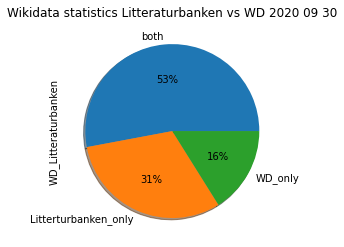

In [15]:
%matplotlib inline 
import matplotlib.pyplot as plt   
mergeCheckNumber = dfmerge["WD_Litteraturbanken"].value_counts()  
plotmerge = mergeCheckNumber.plot.pie( \
                   autopct='%1.0f%%', \
                   shadow=True, startangle=0, \
                   title = "Wikidata statistics Litteraturbanken vs WD " + start_time.strftime('%Y %m %d'))
plt.savefig('LitteraturbankenWD.png')
plt.show()


In [16]:
mergeCheckNumber

both                    1444
Litterturbanken_only     844
WD_only                  439
Name: WD_Litteraturbanken, dtype: int64

In [17]:
pd.set_option("display.max.rows", None) 
 
wdonly = dfmerge[dfmerge["WD_Litteraturbanken"]=="WD_only"]

In [18]:
dfmerge_authorid_norm = pd.merge(wdonly, LitteraturbankenTotShow, left_on='authorid', right_on='authorid_norm',indicator=True)

In [19]:
dfmerge_authorid_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 0 to 126
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   WikidataID           127 non-null    object  
 1   authorid_x           127 non-null    object  
 2   wd_x                 0 non-null      object  
 3   authorid_norm_x      0 non-null      object  
 4   show_x               0 non-null      object  
 5   WD_Litteraturbanken  127 non-null    object  
 6   authorid_y           127 non-null    object  
 7   wd_y                 125 non-null    object  
 8   authorid_norm_y      127 non-null    object  
 9   show_y               127 non-null    bool    
 10  _merge               127 non-null    category
dtypes: bool(1), category(1), object(9)
memory usage: 10.3+ KB


In [20]:
dfmerge_authorid_norm[{'WikidataID','authorid_x','authorid_y'}] 

,authorid_y,authorid_x,WikidataID
0,ÅkerlandE,AkerlandE,Q52502059
1,BoëthiusD,BoethiusD,Q5580507
2,BoëthiusU,BoethiusU,Q52727230
3,BojsenMøllerJ,BojsenMollerJ,Q18964089
4,BöökF,BookF,Q325547
5,BorgströmE,BorgstromE,Q28792579
6,BorgströmL,BorgstromL,Q16503943
7,BörjessonJ,BorjessonJ,Q2308805
8,BoströmCJ,BostromCJ,Q821990
9,BrahePäldre,BrahePaldre,Q1357329
